In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import math
from shapely.geometry import Point
from pyproj import CRS

In [ ]:
drive.mount('/content/drive')
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/comunidades-de-energia.parquet')
shapefile = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/tese/cont-aad-caop2017/Cont_AAD_CAOP2017.shp")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
shapefile_distrito = shapefile.copy()
shapefile_distrito['coddistrito'] = shapefile_distrito['Dicofre'].str[:2]
dissolved_distritos = shapefile_distrito.dissolve(by='coddistrito', aggfunc={'AREA_EA_Ha': 'sum', 'AREA_T_Ha': 'sum', 'Distrito': 'first'})
dissolved_distritos = dissolved_distritos.drop(['Freguesia', 'Concelho'], axis=1, errors='ignore')

In [ ]:
df = df.sort_values(by='data')

In [ ]:
unique_tipo_acc_cer = df['tipo_acc_cer'].unique()
print(unique_tipo_acc_cer)

['ACC' 'CER']


In [ ]:
tipo_acc_cer_counts = df['tipo_acc_cer'].value_counts()
print(tipo_acc_cer_counts)

tipo_acc_cer
ACC    4181
CER      30
Name: count, dtype: int64


In [ ]:
df_grouped = df.groupby(['data', 'tipo_acc_cer'])['contagem_tipo_acc_cer'].sum().reset_index()
df_grouped.rename(columns={'contagem_tipo_acc_cer': 'count'}, inplace=True)
display(df_grouped)

,data,tipo_acc_cer,count
0,2022-06-01,ACC,2
1,2022-07-01,ACC,2
2,2022-08-01,ACC,3
3,2022-09-01,ACC,3
4,2022-10-01,ACC,3
...,...,...,...
60,2025-05-01,CER,2
61,2025-06-01,ACC,421
62,2025-06-01,CER,2
63,2025-07-01,ACC,434


In [ ]:
df_unstacked = df_grouped.set_index(['data', 'tipo_acc_cer']).unstack().reset_index()
df_unstacked.columns.name = None
df_unstacked.columns = ['data', 'ACC', 'CER']
display(df_unstacked)

,data,ACC,CER
0,2022-06-01,2.0,NaN
1,2022-07-01,2.0,NaN
2,2022-08-01,3.0,NaN
3,2022-09-01,3.0,NaN
4,2022-10-01,3.0,NaN
5,2022-11-01,4.0,NaN
6,2022-12-01,4.0,NaN
7,2023-01-01,4.0,NaN
8,2023-02-01,4.0,NaN
9,2023-03-01,5.0,NaN


## Plot the data

### Subtask:
Create a plot to visualize the summed 'contagem_tipo_acc_cer' for 'ACC' and 'CER' over time.


**Reasoning**:
Create a line plot from the `df_unstacked` DataFrame to visualize the time series data for 'ACC' and 'CER'.



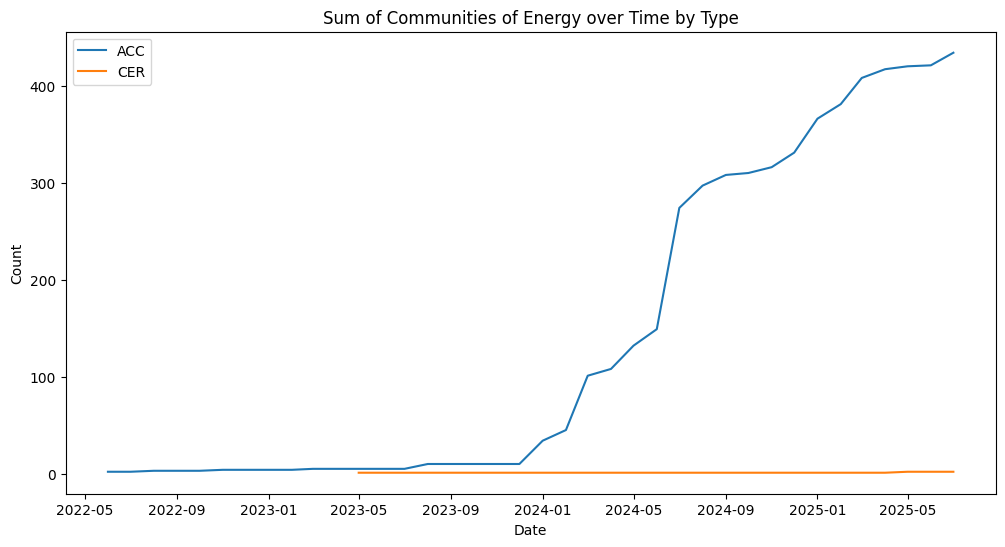

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_unstacked['data'], df_unstacked['ACC'], label='ACC')
plt.plot(df_unstacked['data'], df_unstacked['CER'], label='CER')
plt.title('Sum of Communities of Energy over Time by Type')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()